<a href="https://colab.research.google.com/github/sessihode/Projet-2/blob/main/Projet_NOAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyse exploratoire des données

J'ai récupéré un superbe ensemble de données automobiles sur Kaggle. En bref, ces données contiennent plus de 10 000 lignes et plus de 10 colonnes, qui présentent des caractéristiques du véhicule telles que le type de carburant, la puissance du moteur, le type de transmission, la consommation sur autoroute et en ville, et bien d'autres. Dans ce projet, nous allons explorer ces données et les préparer pour la modélisation.

1. Importation des bibliothèques requises pour EDA

# Nouvelle section

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

2. Chargement des données dans le cadre de données.

Le chargement des données dans le dataframe Pandas est sans aucun doute l'une des étapes les plus importantes de l'EDA, car nous pouvons constater que les valeurs de l'ensemble de données sont séparées par des virgules. Il suffit donc de lire le fichier CSV dans un dataframe, et Pandas s'en charge.

In [ ]:
data = pd . read_csv ("/content/data.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


3. Vérification des types de données

Nous vérifions ici les types de données, car le prix de vente conseillé ou le prix de la voiture peut parfois être stocké sous forme de chaîne. Dans ce cas, nous devons convertir cette chaîne en données entières pour pouvoir les représenter graphiquement. Dans ce cas, les données sont déjà au format entier, donc pas d'inquiétude

In [ ]:
data.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


4. Suppression des colonnes non pertinentes

Cette étape est indispensable dans chaque EDA, car il arrive que de nombreuses colonnes soient inutiles. Dans ce cas, la suppression est la seule solution.

Dans notre cas d'espece, les colonnes telles que « Type de carburant du moteur», « Catégorie de marché », « Style de véhicule »,
 « Popularité », « Nombre de portes » et « Taille du véhicule » ne me semblent pas pertinentes, c'est pourquoi je les ai simplement supprimées.

In [ ]:
data = data.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


5. Renommer les colonnes

Dans ce cas, la plupart des noms de colonnes sont difficiles à lire ; j'ai donc simplement modifié leur nom. Cette approche est judicieuse et améliore la lisibilité de l'ensemble de données.

In [ ]:
data = data.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
data.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,Age
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,13
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,13
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,13
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,13
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,13


6. Suppression des lignes en double

C'est souvent pratique, car un jeu de données volumineux, comme celui-ci, contenant plus de 10 000 lignes, contient souvent des doublons, ce qui peut être gênant. Je supprime donc ici tous les doublons. Par exemple, avant la suppression, j'avais 11 914 lignes de données, mais après, j'en ai 10 925, soit 989 doublons.

In [ ]:
data.shape

(11914, 10)

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (989, 10)


Supprimons maintenant les données en double, car il est tout à fait possible de les supprimer

In [ ]:
data.count()      # Used to count the number of rows

,0
Make,11914
Model,11914
Year,11914
HP,11845
Cylinders,11884
Transmission,11914
Drive Mode,11914
MPG-H,11914
MPG-C,11914
Price,11914


Comme on le voit ci-dessus, il y a 11 914 lignes et nous supprimons 989 lignes de données en double.

In [ ]:
data = data.drop_duplicates()
data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
data.count()

,0
Make,10925
Model,10925
Year,10925
HP,10856
Cylinders,10895
Transmission,10925
Drive Mode,10925
MPG-H,10925
MPG-C,10925
Price,10925


7. Suppression des valeurs manquantes ou nulles.

Cette étape est similaire à l'étape précédente, mais toutes les valeurs manquantes sont détectées et supprimées ultérieurement. Cette approche n'est pas judicieuse, car beaucoup remplacent les valeurs manquantes par la moyenne de la colonne. Dans ce cas, j'ai simplement supprimé ces valeurs manquantes. En effet, il y a près de 100 valeurs manquantes sur 10 000 ; ce chiffre est faible et négligeable. J'ai donc simplement supprimé ces valeurs.

In [ ]:
print(data.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


C'est la raison pour laquelle l'étape ci-dessus, lors du comptage des cylindres et de la puissance (HP), affichait 10 856 et 10 895 sur 10 925 lignes

In [ ]:
data = data.dropna()    # Dropping the missing values.
data.count()

,0
Make,10827
Model,10827
Year,10827
HP,10827
Cylinders,10827
Transmission,10827
Drive Mode,10827
MPG-H,10827
MPG-C,10827
Price,10827


Nous avons maintenant supprimé toutes les lignes qui contiennent les valeurs Null ou N/A (cylindres et puissance (HP))

In [ ]:
print(data.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


8. Détection des valeurs aberrantes

Une valeur aberrante est un point ou un ensemble de points différents des autres. Leur valeur peut parfois être très élevée ou très basse. Il est souvent judicieux de détecter et de supprimer ces valeurs aberrantes, car elles sont l'une des principales causes de la perte de précision du modèle. Il est donc judicieux de les supprimer. La détection et la suppression des valeurs aberrantes que je vais utiliser s'appelle la technique du score IQR. Les valeurs aberrantes sont souvent visualisées à l'aide d'une boîte à moustaches. Vous trouverez ci-dessous la boîte à moustaches du PDSF, des cylindres, de la puissance et de la cylindrée. Sur tous les graphiques, vous pouvez constater que certains points sont hors de la boîte : ce sont des valeurs aberrantes.

<Axes: xlabel='Price'>

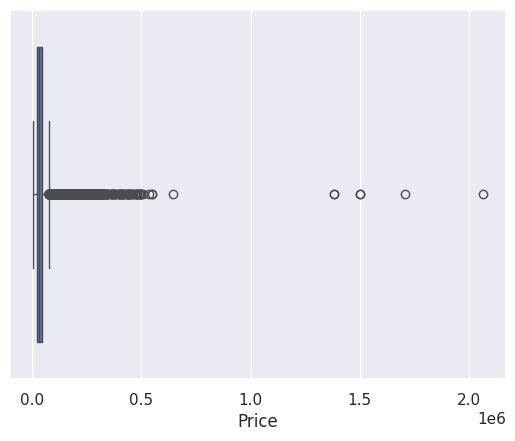

In [ ]:
sns.boxplot(x=data['Price'])

<Axes: xlabel='HP'>

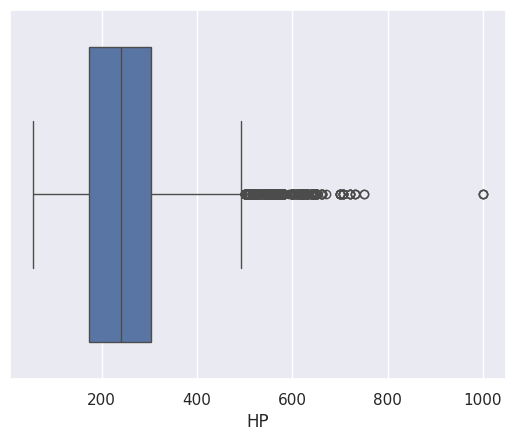

In [ ]:
sns.boxplot(x=data['HP'])

<Axes: xlabel='Cylinders'>

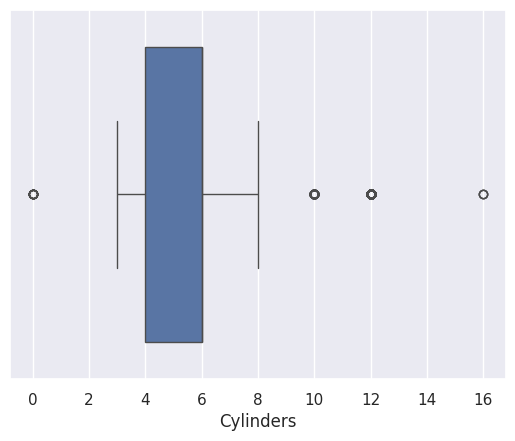

In [ ]:
sns.boxplot(x=data['Cylinders'])

In [ ]:
# 1. Préparation des données numériques
numeric_data = data.select_dtypes(include='number')

# 2. Calcul des quartiles
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [ ]:
# 2. Calcul des quartiles
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# 3. Création du masque
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = ((numeric_data >= lower_bound) & (numeric_data <= upper_bound)).all(axis=1)

# 4. Filtrage
data_clean = data[mask]

# 5. Résultats
print(f"Dimensions originales: {data.shape}")
print(f"Dimensions après nettoyage: {data_clean.shape}")
print(f"Lignes supprimées: {len(data) - len(data_clean)}")

Dimensions originales: (10827, 10)
Dimensions après nettoyage: (9191, 10)
Lignes supprimées: 1636


Ne vous inquiétez pas des valeurs ci-dessus, car il n'est pas important de connaître chacune d'entre elles, mais simplement de savoir comment utiliser cette technique pour supprimer les valeurs aberrantes.

9. Tracée des différentes caractéristiques les unes par rapport aux autres (dispersion), par rapport à la fréquence (histogramme)

Histogramme
L'histogramme représente la fréquence d'occurrence des variables dans un intervalle. Dans ce cas, il existe principalement dix types d'entreprises automobiles différentes, mais il est souvent important de savoir laquelle possède le plus grand nombre de véhicules. Pour ce faire, l'histogramme est une solution simple qui permet de connaître le nombre total de véhicules fabriqués par une entreprise donnée.

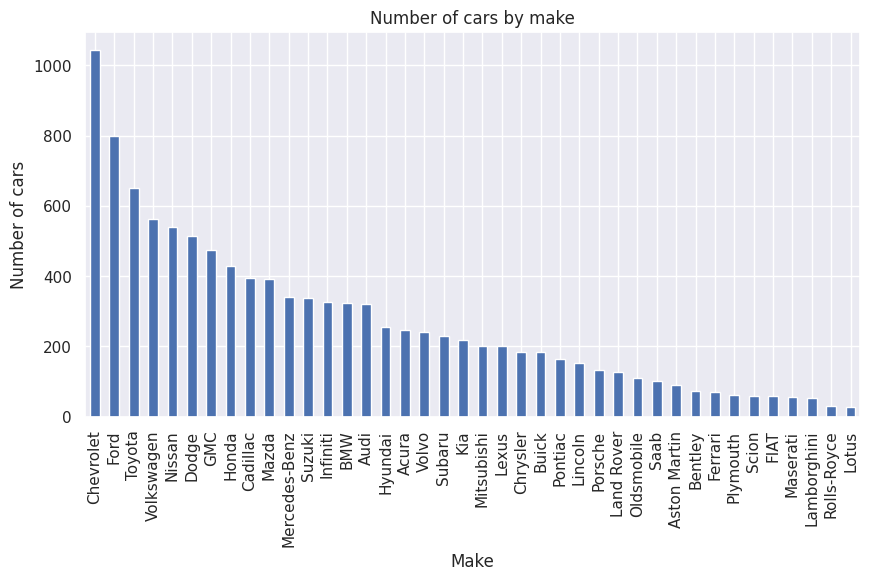

In [ ]:
data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

Distribution des prix (Histogramme + Boxplot)

<Figure size 1000x600 with 0 Axes>

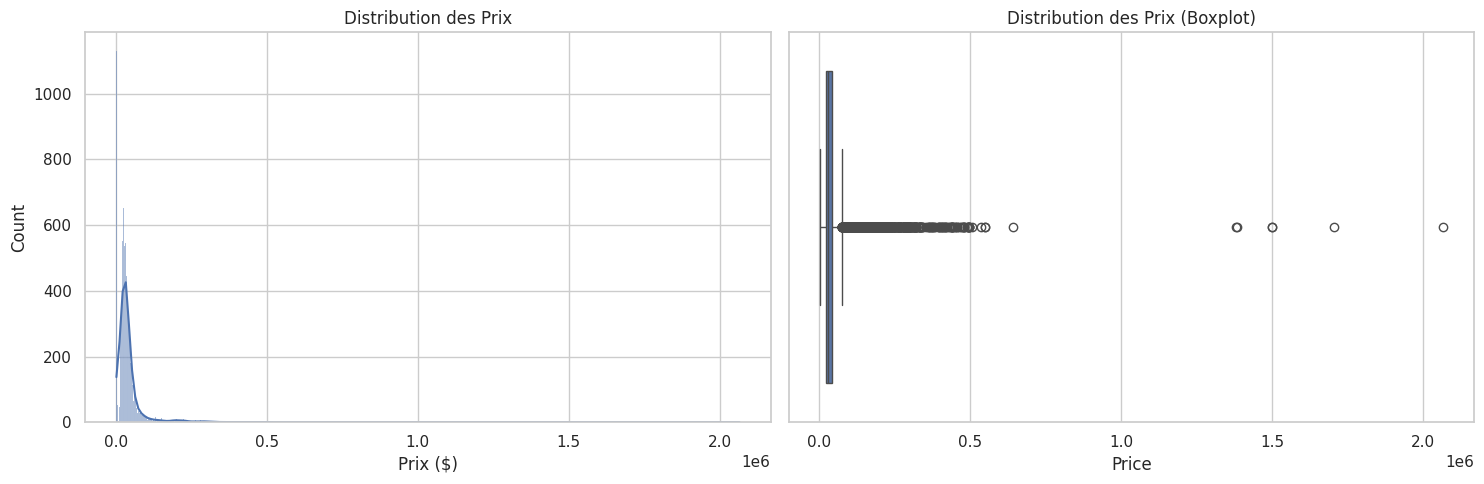

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuration des graphiques
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme
sns.histplot(data['Price'], kde=True, ax=ax[0])
ax[0].set_title('Distribution des Prix')
ax[0].set_xlabel('Prix ($)')

# Boxplot
sns.boxplot(x=data['Price'], ax=ax[1])
ax[1].set_title('Distribution des Prix (Boxplot)')
plt.tight_layout()
plt.show()

Relation entre puissance (HP) et prix

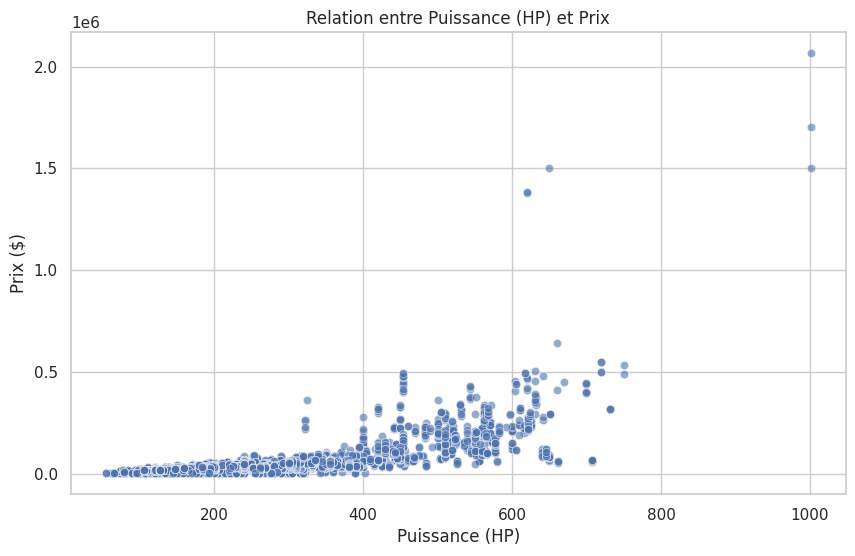

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HP', y='Price', data=data, alpha=0.6)
plt.title('Relation entre Puissance (HP) et Prix')
plt.xlabel('Puissance (HP)')
plt.ylabel('Prix ($)')
plt.show()

Prix moyen par marque (TOP 10)

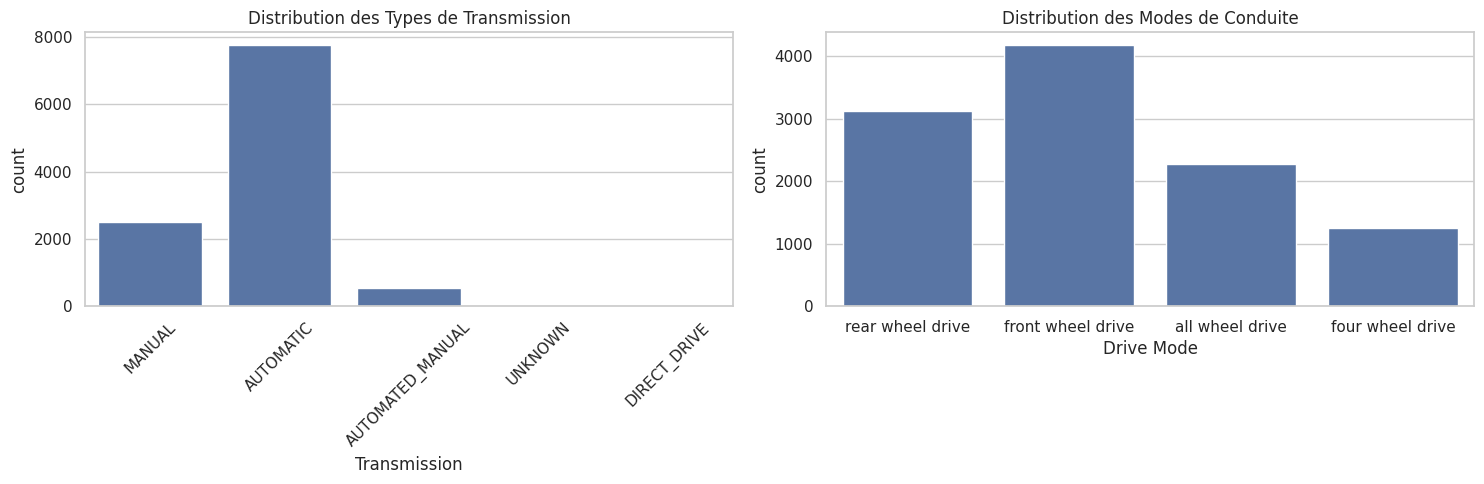

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Type de transmission
sns.countplot(x='Transmission', data=data, ax=ax[0])
ax[0].set_title('Distribution des Types de Transmission')
ax[0].tick_params(axis='x', rotation=45)

# Mode de conduite
sns.countplot(x='Drive Mode', data=data, ax=ax[1])
ax[1].set_title('Distribution des Modes de Conduite')
plt.tight_layout()
plt.show()

Consommation vs. Cylindrée

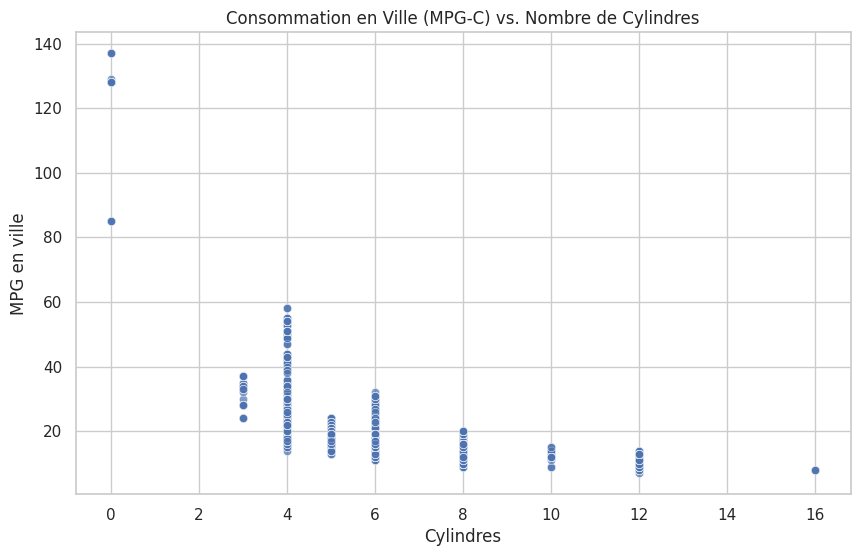

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cylinders', y='MPG-C', data=data, alpha=0.7)
plt.title('Consommation en Ville (MPG-C) vs. Nombre de Cylindres')
plt.xlabel('Cylindres')
plt.ylabel('MPG en ville')
plt.show()

Transmission et mode de conduite

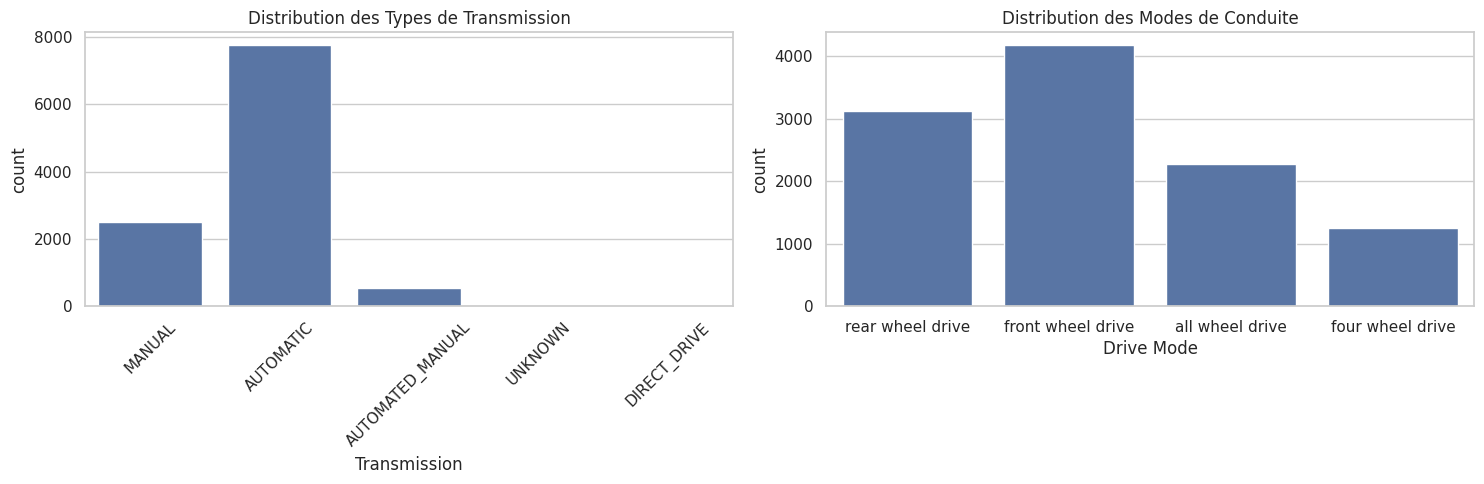

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Type de transmission
sns.countplot(x='Transmission', data=data, ax=ax[0])
ax[0].set_title('Distribution des Types de Transmission')
ax[0].tick_params(axis='x', rotation=45)

# Mode de conduite
sns.countplot(x='Drive Mode', data=data, ax=ax[1])
ax[1].set_title('Distribution des Modes de Conduite')
plt.tight_layout()
plt.show()

Evolution des caractéristiques par année

<ipython-input-26-496421407>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='HP', data=data, ci=None, label='Puissance (HP)')
<ipython-input-26-496421407>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='MPG-C', data=data, ci=None, label='Consommation Ville (MPG-C)')


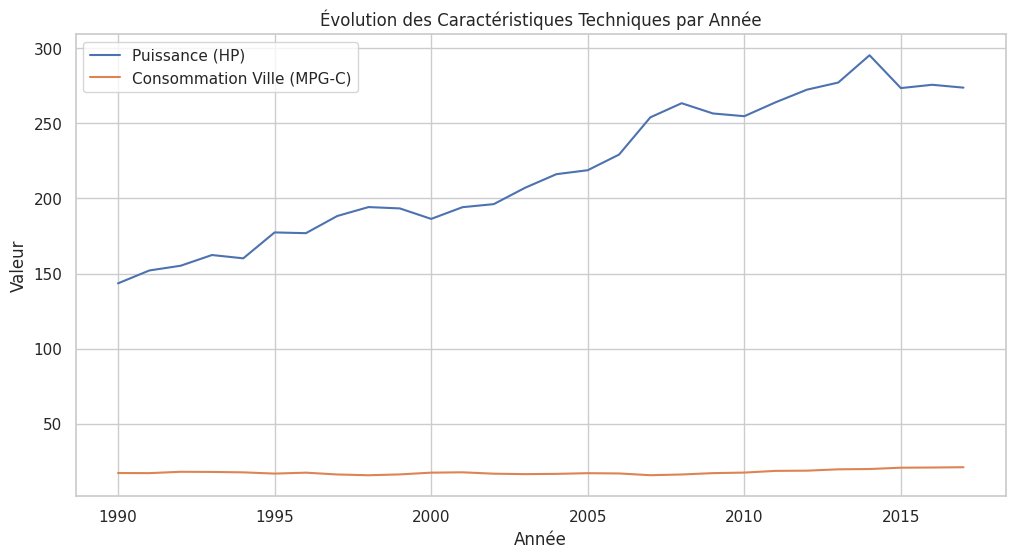

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='HP', data=data, ci=None, label='Puissance (HP)')
sns.lineplot(x='Year', y='MPG-C', data=data, ci=None, label='Consommation Ville (MPG-C)')
plt.title('Évolution des Caractéristiques Techniques par Année')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.legend()
plt.show()

Cartes thermiques

Les cartes thermiques sont un type de graphique nécessaire pour identifier les variables dépendantes. L'une des meilleures façons d'identifier la relation entre les caractéristiques est d'utiliser des cartes thermiques. Dans la carte thermique ci-dessous, nous savons que la caractéristique de prix dépend principalement de la cylindrée, de la puissance et du nombre de cylindres.

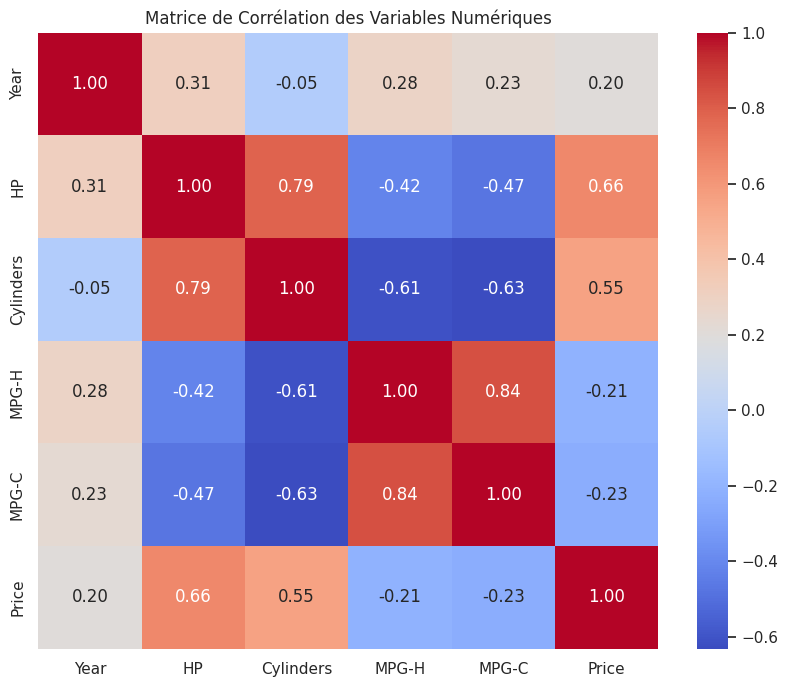

In [ ]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

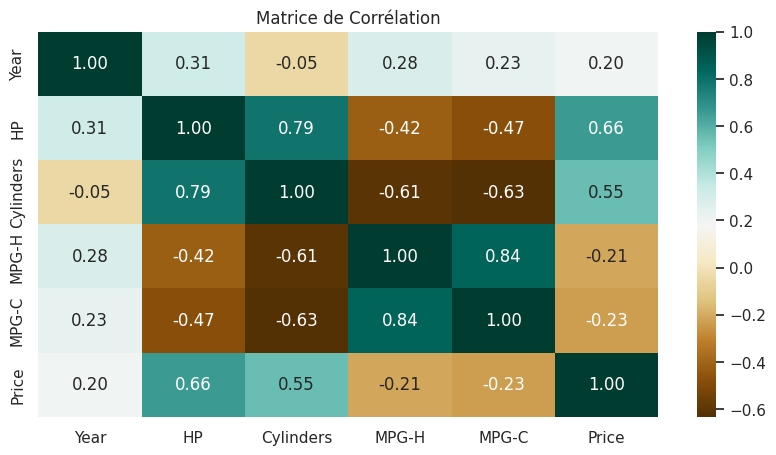

               Year        HP  Cylinders     MPG-H     MPG-C     Price
Year       1.000000  0.314971  -0.050598  0.284237  0.234135  0.196789
HP         0.314971  1.000000   0.788007 -0.420281 -0.473551  0.659835
Cylinders -0.050598  0.788007   1.000000 -0.611576 -0.632407  0.554740
MPG-H      0.284237 -0.420281  -0.611576  1.000000  0.841229 -0.209150
MPG-C      0.234135 -0.473551  -0.632407  0.841229  1.000000 -0.234050
Price      0.196789  0.659835   0.554740 -0.209150 -0.234050  1.000000


In [ ]:
# Filtrer uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,5))
c = numeric_data.corr()
sns.heatmap(c, cmap="BrBG", annot=True, fmt=".2f")  # fmt pour contrôler le format des annotations
plt.title("Matrice de Corrélation")
plt.show()

# Pour afficher également la table numérique
print(c)

Nuage de points

Nous utilisons généralement des nuages ​​de points pour déterminer la corrélation entre deux variables. Ici, les nuages ​​de points sont tracés entre la puissance et le prix, comme le montre le graphique ci-dessous. Ce graphique permet de tracer facilement une ligne de tendance. Ces caractéristiques fournissent une bonne dispersion des points

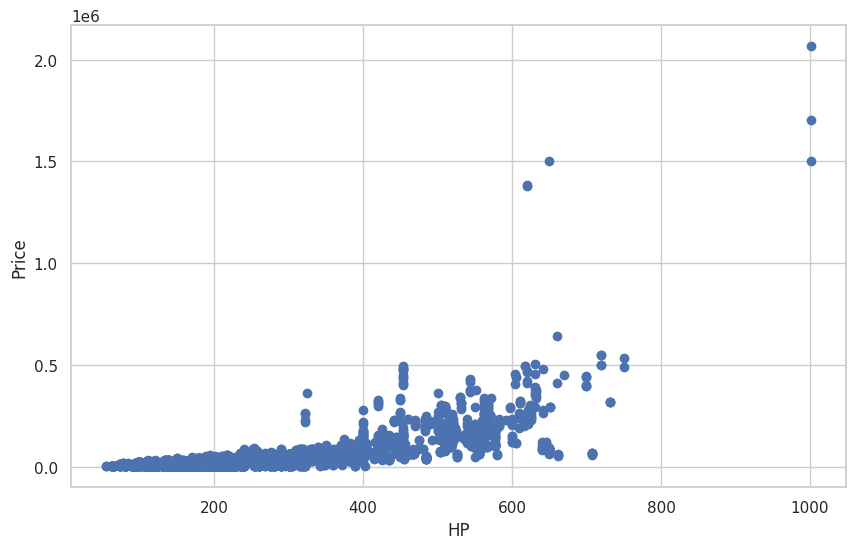

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['HP'], data['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

In [ ]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Age'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# t/data.csvFeature engineering
data['Age'] = 2024 - data['Year']  # Âge du véhicule
data['Power_per_Cylinder'] = data['HP'] / data['Cylinders']
data['Fuel_Efficiency'] = (data['MPG-H'] + data['MPG-C']) / 2

# Définition des colonnes
numerical_cols = ['Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Age',
                 'Power_per_Cylinder', 'Fuel_Efficiency']
categorical_cols = ['Make', 'Model', 'Transmission', 'Drive Mode']
target = 'Price'

# Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), categorical_cols)
    ])

# Séparation des données
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)